# Testing Dose Calculator Function

In [1]:
%pylab ipympl 
%load_ext autoreload
%autoreload 2
import siddon as sd
import dose_calculator as dc
import imshow_slider as ims
from topas2numpy import BinnedResult
import pickle
from scipy import interpolate
import spekpy as sp

Populating the interactive namespace from numpy and matplotlib


## Testing Dose One
This is a 120 keV monoenergetic pencil beam in an ellipse shape moving from positive to negative z. The medium is a 5cm x 5cm x 5cm block of water with 50 voxels in each axis.

In [ ]:
%%time 

# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 201
Ny = 201
Nz = 201

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.1
dy = 0.1
dz = 0.1

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (2.5,-2.5)

# adjustment from center 
adjust = 0.025

# initial plane coordinates
xplane1 = -2.5
yplane1 = -2.5
zplane1 = -2.5

# beam info and filename
beam_energy = 0.120 # in MeV
# fluence_0 = 3.183098862 * 10**10 # photon/cm^2
fluence_0 = 1.e7/(pi*0.05**2) # photon/cm^2
# fluence_0 = 2.53 * 10**8 # photon/cm^2
# fluence_0 = 9.93 * 10**8 # photon/cm^2
# filename = 'energy_absorption_coeff.txt'

# angular (in radians) and positional spread (in cm)
angle_spread_x = 0
angle_spread_y = 0
angle_spread_z = 0

pos_spread_x = 0.01
pos_spread_y = 0.01
pos_spread_z = 0

angle_spread = (angle_spread_x,angle_spread_y,angle_spread_z)
position_spread = (pos_spread_x,pos_spread_y,pos_spread_z)

# densities of each material
densities = [1]

# file names for energy absorption coefficients
filenames = ['energy_absorption_coeffs.txt']

# kernel info
kernelname_water = '../Topas/Kernels/WaterKernel13.csv'
kernelnames = [kernelname_water]
# kernelname = '../Topas/RealKernel1.csv'
kernel_size = (4,4,4) # cm 

# effective distance from center of kernel 
eff_dist = (2,2,2) # cm

# making materials array 
materials = zeros((Nx-1,Ny-1,Nz-1),dtype=int8)

# number of cores to use
num_cores = 16

# Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],mu)

dose = dc.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1+adjust,x2+adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1+adjust,x2+adjust),(y1-adjust,y2-adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1-adjust,y2-adjust),(z1,z2))],(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],angle_spread,position_spread,densities,filenames,kernelnames,kernel_size,eff_dist,materials,num_cores)


Calling Superposition


In [21]:
pickle.dump(dose,open('dose_42.pickle','wb'))

## Testing Dose Two


In [2]:
s = sp.Spek(kvp=120,th=12) # Generate a spectrum (80 kV, 12 degree tube angle)
s.filter('Al', 4.0) # Filter by 4 mm of Al

hvl = s.get_hvl1() # Get the 1st HVL in mm Al

# print(hvl) # Print out the HVL value (Python3 syntax)

beam_energy,fluence_0 = s.get_spectrum()
beam_energy = beam_energy/1000

In [4]:
%%time 

# this doesn't work right now

# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 51
Ny = 51
Nz = 51

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.1
dy = 0.1
dz = 0.1

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (2.5,-2.5)

# adjustment from center 
adjust = 0.025

# initial plane coordinates
xplane1 = -2.5
yplane1 = -2.5
zplane1 = -2.5

# beam info and filename
filename = 'energy_absorption_coeffs.txt'

# kernel info
kernelname = '../Topas/RealKernel1.csv'
kernel_size = (2,2,2) # cm 

# effective distance from center of kernel 
eff_dist = (0.1,0.1,0.1) # cm

# number of cores to use
num_cores = 16

# Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],mu)

dose = sd.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1+adjust,x2+adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1+adjust,x2+adjust),(y1-adjust,y2-adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1-adjust,y2-adjust),(z1,z2))],(xplane1,yplane1,zplane1),beam_energy,fluence_0,filename,kernelname,kernel_size,eff_dist,num_cores)


CPU times: user 9.15 s, sys: 1.01 s, total: 10.2 s
Wall time: 12min 17s


In [5]:
pickle.dump(dose,open('dosetest2_1.pickle','wb'))

## Testing Dose Three

In [14]:
%%time 

# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 51
Ny = 51
Nz = 51

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.1
dy = 0.1
dz = 0.1

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (2.5,-2.5)

# adjustment from center 
adjust = 0.025

# initial plane coordinates
xplane1 = -2.5
yplane1 = -2.5
zplane1 = -2.5

# beam info and filename
beam_energy = 0.120 # in MeV
fluence_0 = 3.183098862 * 10**10 # photon/cm^2
# fluence_0 = 2.53 * 10**8 # photon/cm^2
# fluence_0 = 9.93 * 10**8 # photon/cm^2
# filename = 'energy_absorption_coeff.txt'

# angular (in radians) and positional spread (in cm)
angle_spread_x = 0
angle_spread_y = 0
angle_spread_z = 0

pos_spread_x = 0.01
pos_spread_y = 0.01
pos_spread_z = 0

angle_spread = (angle_spread_x,angle_spread_y,angle_spread_z)
position_spread = (pos_spread_x,pos_spread_y,pos_spread_z)

# file names for energy absorption coefficients
filenames = ['energy_absorption_coeffs.txt','energy_absorption_coeffs_lung.txt','energy_absorption_coeffs_cort_bone.txt']

# kernel info
kernelname_water = '../Topas/Kernels/WaterKernel13.csv'
kernelname_lung = '../Topas/Kernels/LungKernel2.csv'
kernelname_bone = '../Topas/Kernels/BoneKernel5.csv'
kernelnames = [kernelname_water,kernelname_lung,kernelname_bone]
# kernelname = '../Topas/RealKernel1.csv'
kernel_size = (4,4,4) # cm 

# effective distance from center of kernel 
eff_dist = (2,2,2) # cm

# making materials array 
materials = []
for i in range(Nx-1):
    materials.append([])
    for j in range(Ny-1):
        materials[i].append([])
        for k in range((Nz-1)//2):
            materials[i][j].append('b')
        for k in range((Nz-1)//2,Nz-1):
            materials[i][j].append('w')

# number of cores to use
num_cores = 16

# Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],mu)

dose = dc.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1+adjust,x2+adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1+adjust,x2+adjust),(y1-adjust,y2-adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1-adjust,y2-adjust),(z1,z2))],(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],angle_spread,position_spread,filenames,kernelnames,kernel_size,eff_dist,materials,num_cores)


Calling Superposition
0
1
2
3
CPU times: user 1min 11s, sys: 378 ms, total: 1min 12s
Wall time: 1min 12s


In [16]:
pickle.dump(dose,open('dose3_6.pickle','wb'))

## Testing Dose Four
Same set-up as testingdose1 but with fan beam

**MakeRays() is being edited**

In [2]:
%%time 

# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 51
Ny = 51
Nz = 51

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.1
dy = 0.1
dz = 0.1

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (2.5,-2.5)

# number of rays 
num_rays = 1600

# adjustment from center 
adjust = 0.01

rays = dc.MakeFanBeamRays(num_rays,np.pi/6,((x1,x2),(y1,y2),(z1,z2)),direction='y',adjust=adjust,kind='trial')

# initial plane coordinates
xplane1 = -2.5
yplane1 = -2.5
zplane1 = -2.5

# beam info
beam_energy = 0.120 # in MeV
fluence_0 = 3.183098862 * 10**10 # photon/cm^2
# fluence_0 = 2.53 * 10**8 # photon/cm^2
# fluence_0 = 9.93 * 10**8 # photon/cm^2
# filename = 'energy_absorption_coeff.txt'

# angular (in radians) and positional spread (in cm)
angle_spread_x = 0
angle_spread_y = np.pi/6
angle_spread_z = 0

pos_spread_x = 0.01
pos_spread_y = 0.01
pos_spread_z = 0

angle_spread = (angle_spread_x,angle_spread_y,angle_spread_z)
position_spread = (pos_spread_x,pos_spread_y,pos_spread_z)

# file names for energy absorption
filenames = ['energy_absorption_coeffs.txt','energy_absorption_coeffs_lung.txt','energy_absorption_coeffs_cort_bone.txt']

# kernel info
kernelname_water = '../Topas/Kernels/WaterKernel13.csv'
kernelname_lung = '../Topas/Kernels/LungKernel1.csv'
kernelname_bone = '../Topas/Kernels/BoneKernel3.csv'
kernelnames = [kernelname_water,kernelname_lung,kernelname_bone]
# kernelname = '../Topas/RealKernel1.csv'
kernel_size = (4,4,4) # cm 

# effective distance from center of kernel 
eff_dist = (0.1,0.1,0.1) # cm

# making materials array 
materials = []
for i in range(Nx-1):
    materials.append([])
    for j in range(Ny-1):
        materials[i].append([])
        for k in range(Nz-1):
            materials[i][j].append('w')

# number of cores to use
num_cores = 16

# Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],mu)

dose = dc.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),rays,(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],angle_spread,position_spread,filenames,kernelnames,kernel_size,eff_dist,materials,num_cores)


Calling Superposition
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271


In [4]:
pickle.dump(dose,open('dose4_26.pickle','wb'))

## Testing Dose Five 
- like TestingDose1 except bone!

In [4]:
%%time 

# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 51
Ny = 51
Nz = 51

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.1
dy = 0.1
dz = 0.1

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (2.5,-2.5)

# adjustment from center 
adjust = 0.025

# initial plane coordinates
xplane1 = -2.5
yplane1 = -2.5
zplane1 = -2.5

# beam info and filename
beam_energy = 0.120 # in MeV
fluence_0 = 3.183098862 * 10**10 # photon/cm^2
# fluence_0 = 2.53 * 10**8 # photon/cm^2
# fluence_0 = 9.93 * 10**8 # photon/cm^2
# filename = 'energy_absorption_coeff.txt'

# angular (in radians) and positional spread (in cm)
angle_spread_x = 0
angle_spread_y = 0
angle_spread_z = 0

pos_spread_x = 0.01
pos_spread_y = 0.01
pos_spread_z = 0

angle_spread = (angle_spread_x,angle_spread_y,angle_spread_z)
position_spread = (pos_spread_x,pos_spread_y,pos_spread_z)

# file names for energy absorption coefficients
filenames = ['energy_absorption_coeffs.txt','energy_absorption_coeffs_lung.txt','energy_absorption_coeffs_cort_bone.txt']

# kernel info
kernelname_water = '../Topas/Kernels/WaterKernel13.csv'
kernelname_lung = '../Topas/Kernels/LungKernel2.csv'
kernelname_bone = '../Topas/Kernels/BoneKernel5.csv'
kernelnames = [kernelname_water,kernelname_lung,kernelname_bone]
# kernelname = '../Topas/RealKernel1.csv'
kernel_size = (4,4,4) # cm 

# effective distance from center of kernel 
eff_dist = (2,2,2) # cm

# making materials array 
materials = []
for i in range(Nx-1):
    materials.append([])
    for j in range(Ny-1):
        materials[i].append([])
        for k in range(Nz-1):
            materials[i][j].append('b')

# number of cores to use
num_cores = 16

# Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],mu)

dose = dc.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1+adjust,x2+adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1+adjust,x2+adjust),(y1-adjust,y2-adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1-adjust,y2-adjust),(z1,z2))],(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],angle_spread,position_spread,filenames,kernelnames,kernel_size,eff_dist,materials,num_cores)


Calling Superposition
0
1
2
3
CPU times: user 18.9 s, sys: 134 ms, total: 19 s
Wall time: 19 s


In [19]:
pickle.dump(dose,open('dose5_12.pickle','wb'))

## Testing Dose Six
Like testingdose1 except tilted beam

In [4]:
%%time 

# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 51
Ny = 51
Nz = 51

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.1
dy = 0.1
dz = 0.1

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,tan(pi/6)*5)
z1,z2 = (2.5,-2.5)

# adjustment from center 
adjust = 0.025

# initial plane coordinates
xplane1 = -2.5
yplane1 = -2.5
zplane1 = -2.5

# beam info and filename
beam_energy = 0.120 # in MeV
fluence_0 = 3.183098862 * 10**10 # photon/cm^2
# fluence_0 = 9.93 * 10**8 # photon/cm^2
filenames = ['energy_absorption_coeffs.txt','energy_absorption_coeffs_cort_bone.txt']

# kernel info
kernelname_water = '../Topas/Kernels/WaterKernel13.csv'
kernelname_bone = '../Topas/Kernels/BoneKernel3.csv'
kernelnames = [kernelname_water,kernelname_bone]
# kernelname = '../Topas/RealKernel1.csv'
kernel_size = (4,4,4) # cm 

# effective distance from center of kernel 
eff_dist = (2,2,2) # cm

# making materials array 
materials = []
for i in range(Nx-1):
    materials.append([])
    for j in range(Ny-1):
        materials[i].append([])
        for k in range(Nz-1):
            materials[i][j].append('w')

# number of cores to use
num_cores = 16

# Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],mu)

dose = dc.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1+adjust,x2+adjust),(y1,y2),(z1,z2)),((x1-adjust,x2-adjust),(y1,y2),(z1,z2))],(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],filenames,kernelnames,kernel_size,eff_dist,materials,num_cores)


TypeError: Dose_Calculator() missing 2 required positional arguments: 'mat_array' and 'num_cores'

In [11]:
pickle.dump(dose,open('dose6_2.pickle','wb'))

## Testing Dose Seven
- like TestingDose1 except lung!

In [5]:
%%time 

# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 51
Ny = 51
Nz = 51

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.1
dy = 0.1
dz = 0.1

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (2.5,-2.5)

# adjustment from center 
adjust = 0.025

# initial plane coordinates
xplane1 = -2.5
yplane1 = -2.5
zplane1 = -2.5

# beam info and filename
beam_energy = 0.120 # in MeV
fluence_0 = 3.183098862 * 10**10 # photon/cm^2
# fluence_0 = 2.53 * 10**8 # photon/cm^2
# fluence_0 = 9.93 * 10**8 # photon/cm^2
# filename = 'energy_absorption_coeff.txt'

# angular (in radians) and positional spread (in cm)
angle_spread_x = 0
angle_spread_y = 0
angle_spread_z = 0

pos_spread_x = 0.01
pos_spread_y = 0.01
pos_spread_z = 0

angle_spread = (angle_spread_x,angle_spread_y,angle_spread_z)
position_spread = (pos_spread_x,pos_spread_y,pos_spread_z)

# file names for energy absorption coefficients
filenames = ['energy_absorption_coeffs.txt','energy_absorption_coeffs_lung.txt','energy_absorption_coeffs_cort_bone.txt']

# kernel info
kernelname_water = '../Topas/Kernels/WaterKernel13.csv'
kernelname_lung = '../Topas/Kernels/LungKernel2.csv'
kernelname_bone = '../Topas/Kernels/BoneKernel3.csv'
kernelnames = [kernelname_water,kernelname_lung,kernelname_bone]
# kernelname = '../Topas/RealKernel1.csv'
kernel_size = (4,4,4) # cm 

# effective distance from center of kernel 
eff_dist = (2,2,2) # cm

# making materials array 
materials = []
for i in range(Nx-1):
    materials.append([])
    for j in range(Ny-1):
        materials[i].append([])
        for k in range(Nz-1):
            materials[i][j].append('l')

# number of cores to use
num_cores = 16

# Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],mu)

dose = dc.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1+adjust,x2+adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1+adjust,x2+adjust),(y1-adjust,y2-adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1-adjust,y2-adjust),(z1,z2))],(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],angle_spread,position_spread,filenames,kernelnames,kernel_size,eff_dist,materials,num_cores)
# dose = dc.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1,x2),(y1,y2),(z1,z2))],(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],angle_spread,position_spread,filenames,kernelnames,kernel_size,eff_dist,materials,num_cores)



Calling Superposition
0
1
2
3
CPU times: user 1min 9s, sys: 517 ms, total: 1min 9s
Wall time: 1min 10s


In [6]:
pickle.dump(dose,open('dose7_5.pickle','wb'))

## Testing Dose Eight
Same set-up as testingdose1 but with fan beam tilted 30 degrees

**MakeRays() is being edited**

In [15]:
%%time 

# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 51
Ny = 51
Nz = 51

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.1
dy = 0.1
dz = 0.1

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,tan(pi/6)*5)
z1,z2 = (2.5,-2.5)

# number of rays 
num_rays = 100

rays = dc.MakeFanBeamRays(num_rays,np.pi/6,((x1,x2),(y1,y2),(z1,z2)),direction='y',adjust=0.025)

# adjustment from center 
adjust = 0.01

# initial plane coordinates
xplane1 = -2.5
yplane1 = -2.5
zplane1 = -2.5

# beam info
beam_energy = 0.120 # in MeV
fluence_0 = 3.183098862 * 10**10 # photon/cm^2
# fluence_0 = 2.53 * 10**8 # photon/cm^2
# fluence_0 = 9.93 * 10**8 # photon/cm^2
# filename = 'energy_absorption_coeff.txt'

# angular (in radians) and positional spread (in cm)
angle_spread_x = 0
angle_spread_y = np.pi/6
angle_spread_z = 0

pos_spread_x = 0.01
pos_spread_y = 0.01
pos_spread_z = 0

angle_spread = (angle_spread_x,angle_spread_y,angle_spread_z)
position_spread = (pos_spread_x,pos_spread_y,pos_spread_z)

# file names for energy absorption
filenames = ['energy_absorption_coeffs.txt','energy_absorption_coeffs_lung.txt','energy_absorption_coeffs_cort_bone.txt']

# kernel info
kernelname_water = '../Topas/Kernels/WaterKernel13.csv'
kernelname_lung = '../Topas/Kernels/LungKernel1.csv'
kernelname_bone = '../Topas/Kernels/BoneKernel3.csv'
kernelnames = [kernelname_water,kernelname_lung,kernelname_bone]
# kernelname = '../Topas/RealKernel1.csv'
kernel_size = (4,4,4) # cm 

# effective distance from center of kernel 
eff_dist = (0.1,0.1,0.1) # cm

# making materials array 
materials = []
for i in range(Nx-1):
    materials.append([])
    for j in range(Ny-1):
        materials[i].append([])
        for k in range(Nz-1):
            materials[i][j].append('w')

# number of cores to use
num_cores = 16

# Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],mu)

dose = dc.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),rays,(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],angle_spread,position_spread,filenames,kernelnames,kernel_size,eff_dist,materials,num_cores)


KeyboardInterrupt: 

In [6]:
pickle.dump(dose,open('dose8_1.pickle','wb'))

## Testing Dose Nine
same as testing dose 3 but with water to lung interface

In [11]:
%%time 

# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 51
Ny = 51
Nz = 51

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.1
dy = 0.1
dz = 0.1

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (2.5,-2.5)

# adjustment from center 
adjust = 0.025

# initial plane coordinates
xplane1 = -2.5
yplane1 = -2.5
zplane1 = -2.5

# beam info and filename
beam_energy = 0.120 # in MeV
# fluence_0 = 3.183098862 * 10**8 # photon/cm^2
# fluence_0 = 2.53 * 10**8 # photon/cm^2
fluence_0 = 9.93 * 10**8 # photon/cm^2
# filename = 'energy_absorption_coeff.txt'

# angular (in radians) and positional spread (in cm)
angle_spread_x = 0
angle_spread_y = 0
angle_spread_z = 0

pos_spread_x = 0.01
pos_spread_y = 0.01
pos_spread_z = 0

angle_spread = (angle_spread_x,angle_spread_y,angle_spread_z)
position_spread = (pos_spread_x,pos_spread_y,pos_spread_z)

# file names for energy absorption coefficients
filenames = ['energy_absorption_coeffs.txt','energy_absorption_coeffs_lung.txt','energy_absorption_coeffs_cort_bone.txt']

# kernel info
kernelname_water = '../Topas/Kernels/WaterKernel13.csv'
kernelname_lung = '../Topas/Kernels/LungKernel1.csv'
kernelname_bone = '../Topas/Kernels/BoneKernel3.csv'
kernelnames = [kernelname_water,kernelname_lung,kernelname_bone]
# kernelname = '../Topas/RealKernel1.csv'
kernel_size = (4,4,4) # cm 

# effective distance from center of kernel 
eff_dist = (2,2,2) # cm

# making materials array 
materials = []
for i in range(Nx-1):
    materials.append([])
    for j in range(Ny-1):
        materials[i].append([])
        for k in range((Nz-1)//2):
            materials[i][j].append('l')
        for k in range((Nz-1)//2,Nz-1):
            materials[i][j].append('w')

# number of cores to use
num_cores = 16

# Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],mu)

dose = dc.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1+adjust,x2+adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1+adjust,x2+adjust),(y1-adjust,y2-adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1-adjust,y2-adjust),(z1,z2))],(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],angle_spread,position_spread,filenames,kernelnames,kernel_size,eff_dist,materials,num_cores)


Calling Superposition
0
1
2
3
CPU times: user 1min 11s, sys: 375 ms, total: 1min 11s
Wall time: 1min 11s


In [12]:
pickle.dump(dose,open('dose9_1.pickle','wb'))

## Lung Patient

In [ ]:
s = sp.Spek(kvp=120,th=12) # Generate a spectrum (80 kV, 12 degree tube angle)
s.filter('Al', 4.0) # Filter by 4 mm of Al

hvl = s.get_hvl1() # Get the 1st HVL in mm Al

beam_energy,fluence_0 = s.get_spectrum()
beam_energy = beam_energy/1000

In [11]:
%%time 

# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 229
Ny = 131
Nz = 116

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.251
dy = 0.251
dz = 0.25

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (2.5,-2.5)

# adjustment from center 
adjust = 0.025

# initial plane coordinates
xplane1 = -2.5
yplane1 = -2.5
zplane1 = -2.5

# beam info and filename
# beam_energy = 0.120 # in MeV
# fluence_0 = 3.183098862 * 10**8 # photon/cm^2
# fluence_0 = 2.53 * 10**8 # photon/cm^2
# fluence_0 = 9.93 * 10**8 # photon/cm^2
# filename = 'energy_absorption_coeff.txt'

# angular (in radians) and positional spread (in cm)
angle_spread_x = 0
angle_spread_y = 0
angle_spread_z = 0

pos_spread_x = 0.01
pos_spread_y = 0.01
pos_spread_z = 0

angle_spread = (angle_spread_x,angle_spread_y,angle_spread_z)
position_spread = (pos_spread_x,pos_spread_y,pos_spread_z)

# file names for energy absorption coefficients
filenames = ['energy_absorption_coeffs.txt','energy_absorption_coeffs_lung.txt','energy_absorption_coeffs_cort_bone.txt']

# kernel info
kernelname_water = '../Topas/Kernels/WaterKernel13.csv'
kernelname_lung = '../Topas/Kernels/LungKernel1.csv'
kernelname_bone = '../Topas/Kernels/BoneKernel3.csv'
kernelnames = [kernelname_water,kernelname_lung,kernelname_bone]
# kernelname = '../Topas/RealKernel1.csv'
kernel_size = (4,4,4) # cm 

# effective distance from center of kernel 
eff_dist = (2,2,2) # cm

# making materials array 
materials = []
for i in range(Nx-1):
    materials.append([])
    for j in range(Ny-1):
        materials[i].append([])
        for k in range((Nz-1)//2):
            materials[i][j].append('l')
        for k in range((Nz-1)//2,Nz-1):
            materials[i][j].append('w')

# number of cores to use
num_cores = 16

# Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],mu)

dose = dc.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1+adjust,x2+adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1+adjust,x2+adjust),(y1-adjust,y2-adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1-adjust,y2-adjust),(z1,z2))],(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],angle_spread,position_spread,filenames,kernelnames,kernel_size,eff_dist,materials,num_cores)


Calling Superposition
0
1
2
3
CPU times: user 1min 11s, sys: 375 ms, total: 1min 11s
Wall time: 1min 11s


In [12]:
pickle.dump(dose,open('lungpatient_1.pickle','wb'))

## Other Stuff

186

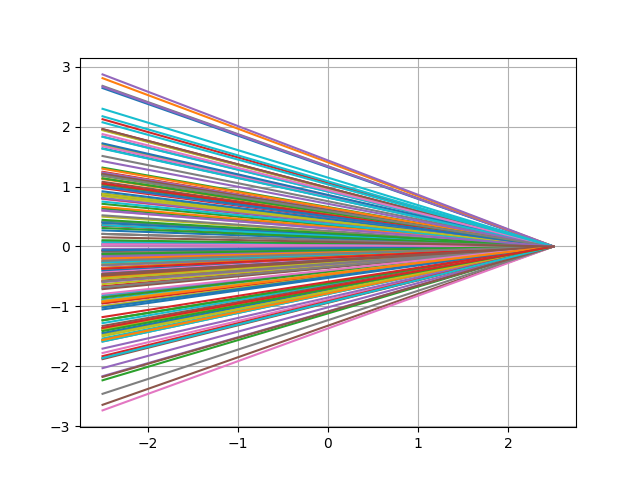

In [22]:
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (2.5,-2.5)
rays = dc.MakeFanBeamRays(200,np.pi/6,((x1,x2),(y1,y2),(z1,z2)),direction='y',adjust=0.1,kind='trial')

ifig=1;close(ifig);figure(ifig)
for ray in rays:
    plot(ray[2],ray[1])
grid(b=True)

len(rays)

### Testing New Superposition

In [41]:
%%time 

# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 6
Ny = 6
Nz = 6

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.1
dy = 0.1
dz = 0.1

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (0.25,-0.25)

# adjustment from center 
adjust = 0.001

# initial plane coordinates
xplane1 = -0.25
yplane1 = -0.25
zplane1 = -0.25

# beam info and filename
beam_energy = 0.120 # in MeV
fluence_0 = 3.183098862 * 10**10 # photon/cm^2
# fluence_0 = 2.53 * 10**8 # photon/cm^2
# fluence_0 = 9.93 * 10**8 # photon/cm^2
# filename = 'energy_absorption_coeff.txt'

# angular (in radians) and positional spread (in cm)
angle_spread_x = 0
angle_spread_y = 0
angle_spread_z = 0

pos_spread_x = 0.001
pos_spread_y = 0.001
pos_spread_z = 0

angle_spread = (angle_spread_x,angle_spread_y,angle_spread_z)
position_spread = (pos_spread_x,pos_spread_y,pos_spread_z)

# file names for energy absorption coefficients
filenames = ['energy_absorption_coeffs.txt','energy_absorption_coeffs_lung.txt','energy_absorption_coeffs_cort_bone.txt']

# kernel info
kernelname_water = '../Topas/Kernels/WaterKernel13.csv'
kernelname_lung = '../Topas/Kernels/LungKernel1.csv'
kernelname_bone = '../Topas/Kernels/BoneKernel3.csv'
kernelnames = [kernelname_water,kernelname_lung,kernelname_bone]
# kernelname = '../Topas/RealKernel1.csv'
kernel_size = (0.4,0.4,0.4) # cm 

# effective distance from center of kernel 
eff_dist = (0.1,0.1,0.1) # cm

# making materials array 
materials = []
for i in range(Nx-1):
    materials.append([])
    for j in range(Ny-1):
        materials[i].append([])
        for k in range(Nz-1):
            materials[i][j].append('w')

# number of cores to use
num_cores = 16

# Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],mu)

dose = dc.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1,x2),(y1,y2),(z1,z2))],(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],angle_spread,position_spread,filenames,kernelnames,kernel_size,eff_dist,materials,num_cores)


Calling Superposition
Kernel Interpolated
0
CPU times: user 24.8 s, sys: 165 ms, total: 25 s
Wall time: 25 s


In [23]:
lst = [[1,2,3],[1,2,3],[1,2,3]]
arr = array(lst)
arr.tolist()

[[1, 2, 3], [1, 2, 3], [1, 2, 3]]

In [10]:
kernelname = '../Topas/ReverseEngineerKernel.csv'
kernel_array = BinnedResult(kernelname).data['Sum']

In [6]:
kernelname = '../Topas/Kernels/WaterKernel6.csv'
kernel_array = BinnedResult(kernelname).data['Sum']

In [5]:
kernelname = '../Topas/BoneKernel1.csv'
kernel_array = BinnedResult(kernelname).data['Sum']

In [6]:
data = BinnedResult('../Topas/EnergyFluence.csv').data['Sum']

In [7]:
where(data==np.max(data))

(array([25]), array([24]), array([49]))

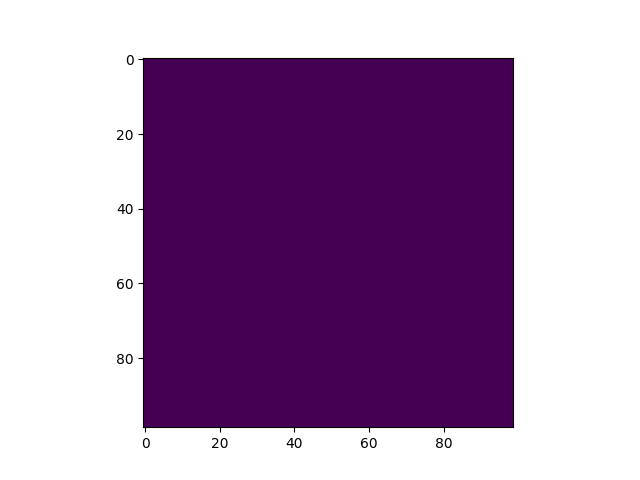

In [7]:
fig,ax,controls = ims.slider(kernel_array)

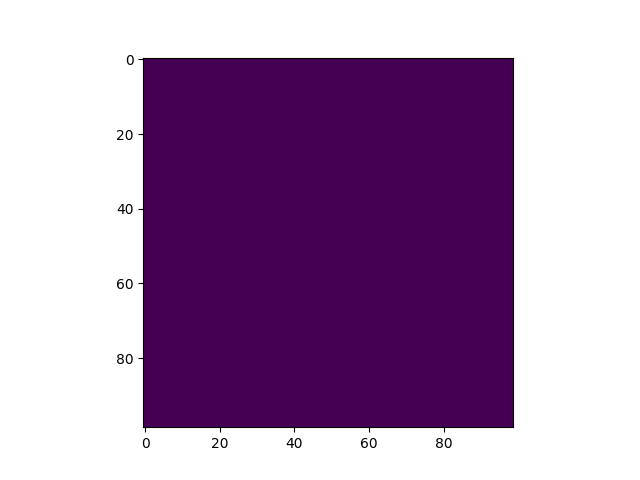

In [8]:
fig,ax,controls = ims.slider(kernel_array)

In [7]:
(int(np.floor(len(kernel_array)/2)),int(np.floor(len(kernel_array[0])/2)),int(np.floor(len(kernel_array[0][0])/2)))

(49, 49, 49)

In [16]:
my_dose_array = pickle.load(open('dose_1.pickle','rb'))
mc_dose_array_full = BinnedResult('../Topas/TestingDose1.csv')
mc_dose_array = mc_dose_array_full.data['Sum']

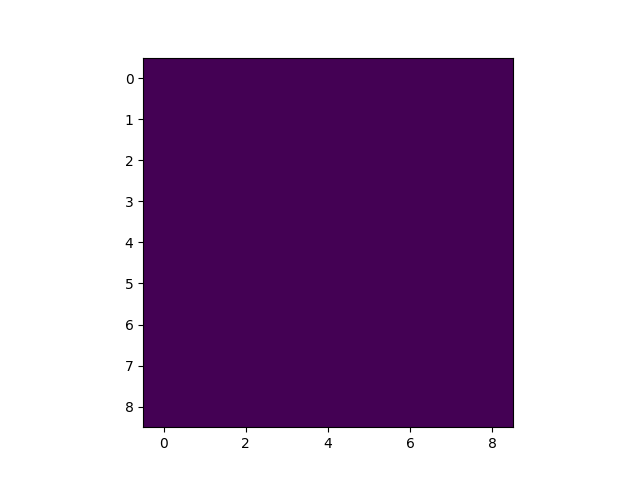

In [15]:
fig,ax,controls = ims.slider(dose)

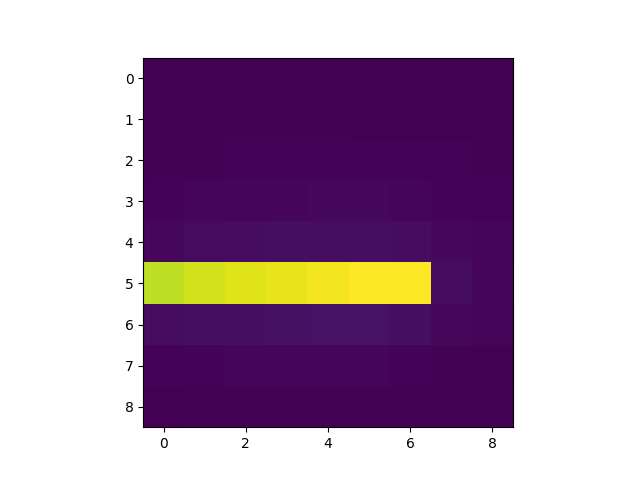

In [18]:
close(5);figure(5)
imshow(dose[4])